# Installation

In [1]:
!pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 65.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.2
    Uninstalling transformers-4.40.2:
      Successfully uninstalled transformers-4.40.2


In [2]:
!pip install tensorflow==2.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [3]:
!python -c "import tensorflow as tf; print(tf.__version__)"

2024-05-09 20:58:33.633351: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 20:58:33.633404: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 20:58:33.635413: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-09 20:58:33.646082: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-09 20:58:35.536276: W tensorflow/comp

In [4]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 54.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 75.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 52.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.41.3-py3-none-any.whl size=25316960 sha256=a6f2fd86ebef974549cfd7964392804cd83714f178a425ec7b80c946c215f8d1
  Stored in directory: /root/.cache/pip/wheels/fc/76/11/5b953090eebf531f660948a30cd26e70260619f6480f186a5a
  Created wheel for keras_bert: filename=

# Environment Setup

In [5]:
#Checking for GPU
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Thu May  9 20:59:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-------

# Libraries

In [6]:
# Generic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings, gc
warnings.filterwarnings("ignore")

# ktrain
import ktrain
from ktrain import text

# sklearn
from sklearn.model_selection import train_test_split

## Data

In [7]:
df = pd.read_csv('/content/newsfeed.csv',usecols=['Body','category'])
df.sample(10)

,category,Body
5128,Middle East News,اوسط عراق مفوض انتخاب عد مراجع شامل بيان المفو...
2184,Science and Technology,سبب نتشار انفلونز الخنازير زوير الفياغرا تراجع...
2251,Science and Technology,مشتبه بانفلونزا خنازير متحده مشتبه بانفلونزا خ...
3315,World,جيش امريك بد عمل عسكر سع افغانس جيش امريك بد ع...
1128,Middle East News,مصر ءجل محاكم خل حزب اكتوبر مقبل سبت الاول اكت...
3181,World,زوج ايدن كشف عرض اوبام منصب خارجيه زوج زوج ايد...
7912,Entertainment,عرض قضاي داول مستخدم موقع تواصل اجتماع عالم عر...
407,Business,سهم كويت واصل راجع دب صعد مستو قياس سهم كويت و...
7325,Science and Technology,مراهق عاصمه صينيه كين اثنين جراء اصاب مرض انفل...
3224,World,رسال جديده ظواهر دعو باكستان دعم مسلح رسال جدي...


In [8]:
X = df['Body']
y = df['category']
X_train, X_test , y_train,y_test = train_test_split(np.array(X),np.array(y),test_size=0.2, random_state=0,stratify=y)
print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_test:', y_test.shape)

Shape of X_train: (7027,)
Shape of y_train: (7027,)
Shape of X_test: (1757,)
Shape of y_test: (1757,)


# Model Configuration

In [9]:
MODEL_NAME = 'aubmindlab/bert-base-arabertv01'

In [10]:
t = text.Transformer(MODEL_NAME, maxlen=128)
train = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

config.json:   0%|          | 0.00/576 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

preprocessing train...
language: ar
train sequence lengths:
	mean : 256
	95percentile : 567
	99percentile : 834


tokenizer_config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/780k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.70M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: ar
test sequence lengths:
	mean : 250
	95percentile : 531
	99percentile : 795


# Training

In [11]:
model = t.get_classifier(metrics=['accuracy'])
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=32)
learner.fit_onecycle(5e-5,10)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/10
220/220 [==============================] - 221s 885ms/step - loss: 0.8002 - accuracy: 0.7562 - val_loss: 0.2500 - val_accuracy: 0.9237
Epoch 2/10
220/220 [==============================] - 193s 877ms/step - loss: 0.2050 - accuracy: 0.9422 - val_loss: 0.2037 - val_accuracy: 0.9368
Epoch 3/10
220/220 [==============================] - 193s 877ms/step - loss: 0.1318 - accuracy: 0.9636 - val_loss: 0.2056 - val_accuracy: 0.9351
Epoch 4/10
220/220 [==============================] - 193s 877ms/step - loss: 0.0971 - accuracy: 0.9745 - val_loss: 0.2229 - val_accuracy: 0.9397
Epoch 5/10
220/220 [==============================] - 193s 878ms/step - loss: 0.0916 - accuracy: 0.9750 - val_loss: 0.2469 - val_accuracy: 0.9340
Epoch 6/10
220/220 [==============================] - 193s 878ms/step - loss: 0.0792 - accuracy: 0.9798 - val_loss: 0.2443 - val_accuracy: 0.9385
Epoch 7/10
220/220 [==============================] - 193s 87

# Evaluation

In [12]:
validation = learner.validate(class_names=t.get_classes())
validation

55/55 [==============================] - 19s 275ms/step
                        precision    recall  f1-score   support

              Business       0.96      0.97      0.96       347
         Entertainment       0.89      0.86      0.87       153
      Middle East News       0.97      0.96      0.96       402
Science and Technology       0.92      0.92      0.92       272
                 Sport       0.98      0.99      0.99       182
                 World       0.97      0.98      0.97       401

              accuracy                           0.95      1757
             macro avg       0.95      0.95      0.95      1757
          weighted avg       0.95      0.95      0.95      1757



array([[335,   3,   1,   8,   0,   0],
       [  4, 131,   3,  13,   1,   1],
       [  2,   2, 385,   1,   3,   9],
       [  9,   9,   1, 251,   0,   2],
       [  0,   0,   0,   0, 181,   1],
       [  0,   2,   7,   1,   0, 391]])

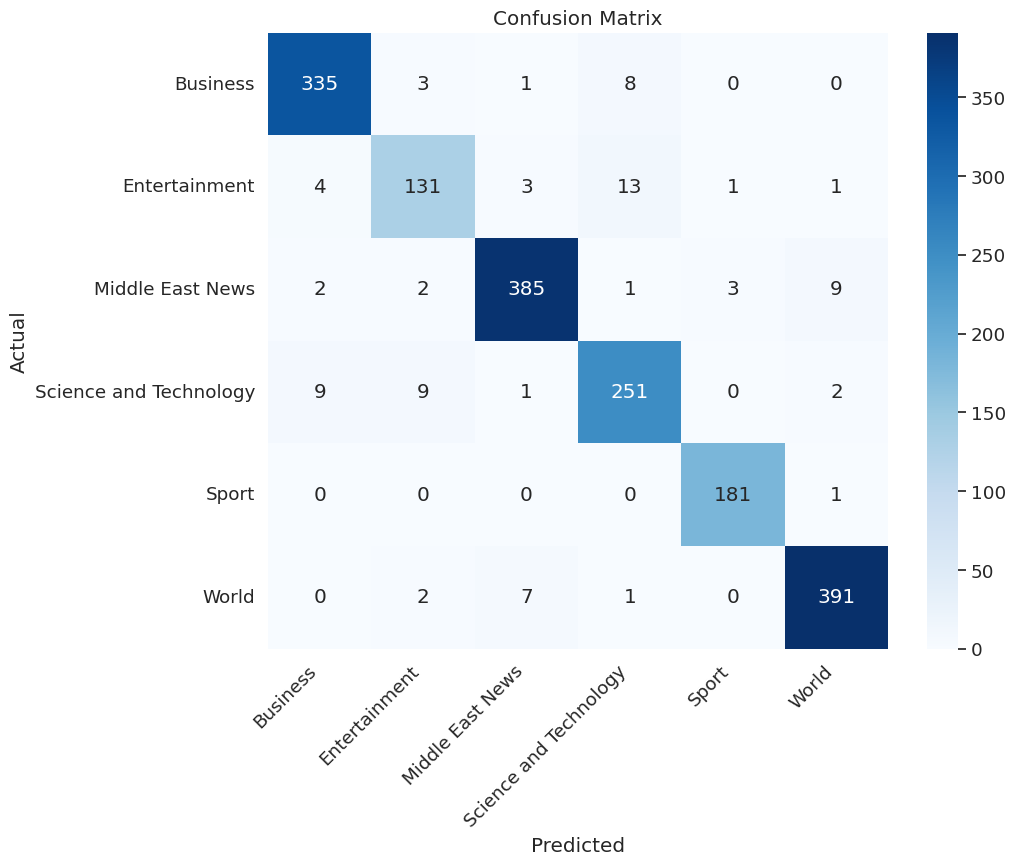

In [14]:
# Confusion matrix data
conf_matrix = np.array([[335,   3,   1,   8,   0,   0],
                        [  4, 131,   3,  13,   1,   1],
                        [  2,   2, 385,   1,   3,   9],
                        [  9,   9,   1, 251,   0,   2],
                        [  0,   0,   0,   0, 181,   1],
                        [  0,   2,   7,   1,   0, 391]])

# Class names
class_names = df.category.unique()

# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # Adjust font scale if needed
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()